# Solara + AnyWidget

Alonso Silva, Nokia Bell Labs, May 22nd, 2024

# Solara

## Introduction
![GitHub Stars History](./assets/star-history.png "GitHub Stars History"){ width=10% }

## Code complexity vs App size

![Code complexity vs App size](./assets/Code_complexity_vs_App_size.jpg "Solara"){ width=50% }

## Installation
```console
pip install solara
```

To run it
```console
solara run app.py
```

## Solara: Basic App

In [1]:
import solara as sl

@sl.component
def Page():
    sl.Markdown("# Solara app")
    sl.Text("This is a Solara app.")
    clicked = sl.use_reactive(False)
    sl.Button("Click me!", on_click=lambda: clicked.set(True))
    if clicked.value:
        sl.Text("Hey there!")

Page()

Cannot show ipywidgets in text

In [2]:
import solara as sl

@sl.component
def Page():
    sl.Markdown("# Solara app")
    sl.Text("This is a Solara app")
    clicked = sl.use_reactive(False)
    sl.Button("Click me!", on_click=lambda: clicked.set(True))
    if clicked.value:
        sl.Text("Hey there!")
Page()

Cannot show ipywidgets in text

## Solara: State Management

In [3]:
import solara as sl

@sl.component
def Page():
    sl.Markdown("# Solara app")
    sl.Text("This is a Solara app")
    clicked = sl.use_reactive(False)
    sl.Button("Click me!", on_click=lambda: clicked.set(True))
    if clicked.value:
        sl.Text("Hey there!")
    sl.Button("Another button")
Page()

Cannot show ipywidgets in text

In [4]:
import solara as sl

@sl.component
def Page():
    sl.Markdown("# Solara app")
    sl.Text("This is a Solara app")
    clicked = sl.use_reactive(False)
    sl.Button("Click me!", on_click=lambda: clicked.set(True))
    if clicked.value:
        sl.Text("Hey there!")
    sl.Button("Click me!")
Page()

Cannot show ipywidgets in text

## Solara: Reusable components

In [5]:
import solara as sl
import time

@sl.component
def Process():
    option = sl.use_reactive("Default")
    options = ["Default", "Method A", "Method B", "Method C"]
    sl.Select(label="Select Method:", value=option, values=options)
    if option.value in ["Method A", "Method B", "Method C"]:
        time.sleep(3) # Simulate a process
        sl.Markdown(f"**Result for: {option.value}**")

In [6]:
Process()

Cannot show ipywidgets in text

In [7]:
@sl.component
def Page():
    with sl.Column(margin=12):
        sl.Markdown("# Comparison App")
        with sl.Row(margin=12):
            Process()
            Process()
            Process()

In [8]:
Page()

Cannot show ipywidgets in text

## Solara: React-style

In [9]:
import solara as sl

@sl.component
def Page():
    sl.Markdown("# Solara App: React-style")
    text = sl.use_reactive("Hello!")
    with sl.Row():
        sl.InputText("Enter some text:", value=text, continuous_update=True)
        sl.Button(
            "Reset",
            on_click=lambda: text.set(""),
            style="color:white;background-color:red;",
        )
    sl.Markdown(f"{text.value}", style="color:blue;font-size:2em;")
Page()

Cannot show ipywidgets in text

In [10]:
import random
import tiktoken
import pandas as pd
# Get tokenizer for gpt-4
tokenizer = tiktoken.encoding_for_model("gpt-4")

In [11]:
@sl.component
def Token(token: int):
    # create random color dependent on the token
    random.seed(token)
    random_color = "".join([random.choice("0123456789ABCDEF") for k in range(6)])
    with sl.Div(style="display: inline;"):
        with sl.Div(
            style={
                "display": "inline",
                "padding": "8px",
                "border-right": "3px solid white",
                "line-height": "3em",
                "font-family": "courier",
                "background-color": f"#{random_color}",
                "color": "white",
                "position": "relative",
            },
        ):
            sl.Text(
                " " + str(token),
                style={
                    "display": "inline",
                    "position": "absolute",
                    "top": "6.5ch",
                    "line-height": "1em",
                    "left": "2px",
                    "font-size": "0.45em",
                },
            )
            sl.Text(str(tokenizer.decode([token])))

Token(9906)

Cannot show ipywidgets in text

In [12]:
# Create dataframe mapping token IDs and tokens
MAX_TOKENS = 100256
df = pd.DataFrame()
df["token ID"] = range(MAX_TOKENS)
df["token"] = [tokenizer.decode([i]) for i in range(MAX_TOKENS)]

In [13]:
sentence = sl.reactive("Example text is here")
tokens_ids_to_lookup = sl.reactive("")
tokens_filter = sl.reactive("")

In [14]:
@sl.component
def Page():
    with sl.Column(margin=10):
        sl.Markdown("# GPT-4 token encoder and decoder")
        sl.Markdown("This is an educational tool for understanding how tokenization works.")

        sl.InputText("Enter text to tokenize it:", value=sentence, continuous_update=True)
        tokens = tokenizer.encode(sentence.value)
        with sl.Div(style="display: inline;"):
            for token in tokens:
                Token(token)
        sl.InputText("Or convert space separated tokens to text:", value=tokens_ids_to_lookup, continuous_update=True)
        token_input = [int(span) for span in tokens_ids_to_lookup.value.split(" ") if span != ""]
        if all(x < 100256 for x in token_input):
            text_output = tokenizer.decode(token_input)
            sl.Markdown(f"{text_output}")
        else:
            sl.Warning("Numbers should be smaller than 100,255")
        sl.Markdown("## Search tokens")
        sl.InputText("Search for a token:", value=tokens_filter, continuous_update=True)
        df_subset = df[df["token"].str.startswith(tokens_filter.value)]
        sl.Markdown(f"{df_subset.shape[0]:,} results")
        sl.DataFrame(df_subset, items_per_page=10)

In [15]:
Page()

Cannot show ipywidgets in text

In [16]:
from IPython.display import IFrame

IFrame(
    src="https://alonsosilva-knowledgegraph.hf.space",
    width='100%', 
    height='650px'
)

## Solara: Customization

In [17]:
import solara as sl

@sl.component
def Page():
    with sl.Column(margin=12):
        sl.Markdown("# Solara app")
        sl.Text("This is a Solara app")
        clicked = sl.use_reactive(False)
        with sl.Row():
            sl.Button(
                "Click me!",
                on_click=lambda: clicked.set(True),
                style="background-color:lightgreen; color:dodgerblue;",
            )
        if clicked.value:
            sl.Text("Hey there!", 
                style="font-size:2em; font-family:Lucida Handwriting; color:indianred;")
Page()

Cannot show ipywidgets in text

In [18]:
import solara as sl

_css = """
    .mybutton {
        background-color:lightgreen!important;
        color:dodgerblue!important;
    }
    .mytext {
        font-size:2em;
        font-family:Lucida Handwriting; 
        color:indianred;
    }
    """

@sl.component
def Page():
    with sl.Column(margin=12):
        sl.Markdown("# Solara app")
        sl.Text("This is a Solara app")
        clicked = sl.use_reactive(False)
        sl.Style(_css)
        with sl.Row():
            sl.Button(
                "Click me!", on_click=lambda: clicked.set(True), classes=["mybutton"]
            )
        if clicked.value:
            sl.Text(
                "Hey there!",
                classes=["mytext"],
            )
Page()

Cannot show ipywidgets in text

## Solara: IPyWidgets

In [19]:
import solara as sl
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt

@sl.component
def PlotLeft(alpha, beta, color1, color2):
    fig = plt.figure(figsize=(4, 5))
    xlim, ylim = [-np.pi, np.pi], [-1, 1]
    x = np.linspace(*xlim)
    plt.plot(x, beta*np.sin(x * alpha), label=r'$\beta\sin(\alpha x)$', color=color1)
    plt.plot(x, (1-beta)*np.cos(2*alpha*x), label=r'$(1-\beta)\cos(2\alpha x)$', color=color2)
    plt.xlabel('$x$')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.legend()
    plt.show()

PlotLeft(1,.5,"blue","red")

Cannot show ipywidgets in text

In [20]:
@sl.component
def PlotRight(alpha):
    fig = plt.figure(figsize=(4, 5))
    xlim, ylim = [-np.pi, np.pi], [0, 10]
    x = np.linspace(*xlim)
    plt.plot(x, np.exp(x * alpha), label=r'$e^{\alpha x}$')
    plt.xlabel('$x$')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.legend()
    plt.show()

In [21]:
PlotRight(1)

Cannot show ipywidgets in text

In [22]:
alpha = sl.reactive(1.0)
beta = sl.reactive(.5)
color1 = sl.reactive('blue')
color2 = sl.reactive('red')

In [23]:
@sl.component
def Controls():
    with sl.Column(style="padding:50px"):
        sl.Markdown("Parameters")
        widgets.FloatSlider.element(
            min=0, 
            max=2, 
            value=alpha.value, 
            on_value=alpha.set, 
            description="$\\alpha$"
        )
        widgets.FloatSlider.element(
            min=0,
            max=1,
            value=beta.value,
            on_value=beta.set,
            continuous_update=False,
            description="$\\beta$",
        )
        sl.Markdown("Colors")
        widgets.Dropdown.element(
            options=["blue", "green", "red"],
            value=color1.value,
            on_value=color1.set,
            description=r"$\beta\sin(\alpha x)$",
        )
        widgets.Dropdown.element(
            options=["red", "yellow", "orange"],
            value=color2.value,
            on_value=color2.set,
            description=r"$(1-\beta)\cos(2\alpha x)$",
            style={"description_width": "initial"},
        )

In [24]:
Controls()

Cannot show ipywidgets in text

In [25]:
@sl.component
def Page():
    with sl.Column(style="padding:50px;"):
        with sl.Row():
            PlotLeft(alpha.value, beta.value, color1.value, color2.value)
            Controls()
            PlotRight(alpha.value)
Page()

Cannot show ipywidgets in text

In [26]:
@sl.component
def Controls():
    with sl.Column(style="padding:50px"):
        sl.Text("Parameters")
        sl.SliderFloat("α", value=alpha, min=0, max=2)
        sl.SliderFloat("β", value=beta, min=0, max=1)
        sl.Text("Colors")
        sl.Select(label='βsin(αx)', value=color1, values=['blue', 'green', 'red'])
        sl.Select(label='(1-β)cos(2αx)', value=color2, values=['red', 'yellow', 'orange'])

In [27]:
Controls()

Cannot show ipywidgets in text

In [28]:
@sl.component
def Page():
    with sl.Column(style="padding:50px;"):
        with sl.Row():
            PlotLeft(alpha.value, beta.value, color1.value, color2.value)
            Controls()
            PlotRight(alpha.value)
Page()

Cannot show ipywidgets in text

# AnyWidget

## Cars dataset

In [29]:
from vega_datasets import data

df = data.cars()
df.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


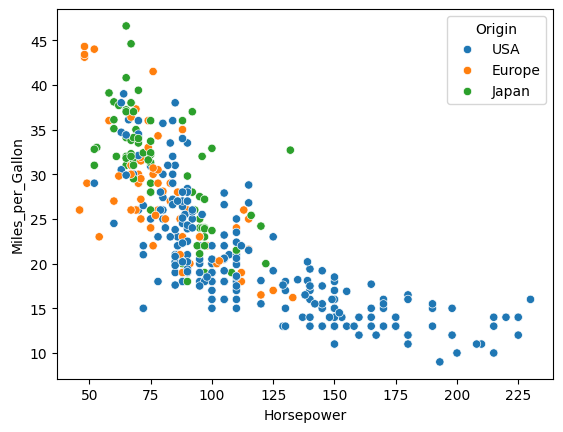

In [30]:
import seaborn as sns

sns.scatterplot(x="Horsepower", y="Miles_per_Gallon", hue="Origin", data=df);

In [31]:
import altair as alt

brush = alt.selection_interval()
points = alt.Chart(df).mark_point().encode(
    x = "Horsepower",
    y = "Miles_per_Gallon",
    color = alt.condition(brush, "Origin", alt.value("lightgray")),
    tooltip = ["Horsepower", "Miles_per_Gallon"],
).add_params(
    brush
)
bars = alt.Chart(df).mark_bar().encode(
    y = "Origin",
    color = "Origin",
    x = "count(Origin)"
).transform_filter(
    brush
)

In [32]:
chart = (points & bars)
chart

alt.VConcatChart(...)

## AnyWidget

In [33]:
import anywidget
import traitlets

class CounterWidget(anywidget.AnyWidget):
    _esm = """
    /* @param {{ model: DOMWidgetModel, el: HTMLElement }} context */
    function render({ model, el }) {
      let getCount = () => model.get("count");
      let button = document.createElement("button");
      button.classList.add("counter-button");
      button.innerHTML = `count is ${getCount()}`;
      button.addEventListener("click", () => {
        model.set("count", getCount() + 1);
        model.save_changes();
      });
      model.on("change:count", () => {
        button.innerHTML = `count is ${getCount()}`;
      });
      el.appendChild(button);
    }
    export default { render };
    """
    _css="""
    .counter-button { background-color: #ea580c; }
    .counter-button:hover { background-color: #9a3412; }
    """
    count = traitlets.Int(0).tag(sync=True)

In [34]:
w = CounterWidget()
w

CounterWidget()

In [35]:
w = CounterWidget()
w

CounterWidget()

In [36]:
w.count

0

In [37]:
w.count = 42

In [38]:
import anywidget
import traitlets

class CounterWidget(anywidget.AnyWidget):
    _esm = """
    import confetti from "https://esm.sh/canvas-confetti@1.6.0";
    /* @param {{ model: DOMWidgetModel, el: HTMLElement }} context */
    function render({ model, el }) {
      let getCount = () => model.get("count");
      let button = document.createElement("button");
      button.classList.add("counter-button");
      button.innerHTML = `count is ${getCount()}`;
      button.addEventListener("click", () => {
        model.set("count", getCount() + 1);
        model.save_changes();
      });
      model.on("change:count", () => {
        button.innerHTML = `count is ${getCount()}`;
        confetti({ angle: 90 + getCount() });
      });
      el.appendChild(button);
    }
    export default { render };
    """
    _css="""
    .counter-button { background:lightblue; padding:10px 50px;}
    .counter-button:hover { background-color:green; }
    """
    count = traitlets.Int(0).tag(sync=True)

In [39]:
w = CounterWidget()
w

CounterWidget()

In [40]:
w.count = 42

In [41]:
%env ANYWIDGET_HMR=1

env: ANYWIDGET_HMR=1


In [42]:
class CardsWidget(anywidget.AnyWidget):
    _esm = "./dealcards/draw.js"
    _css = "./dealcards/style.css"
    def click(self):
        self.send({"type": "click"})
    value = traitlets.Int(13).tag(sync=True)

In [43]:
w = CardsWidget()
w

CardsWidget()

In [44]:
w.value = 5
w

CardsWidget(value=5)

In [45]:
w.click()

## Let's go back to the original problem...

In [46]:
chart = (points & bars)
chart

alt.VConcatChart(...)

In [47]:
import anywidget
import traitlets

class ChartWidget(anywidget.AnyWidget):
    spec = traitlets.Dict().tag(sync=True)
    selection = traitlets.Dict().tag(sync=True)
    _esm = """
    import embed from "https://cdn.jsdelivr.net/npm/vega-embed@6/+esm";
    async function render({ model, el }) {
        let spec = model.get("spec");
        let api = await embed(el, spec);
        api.view.addSignalListener(spec.params[0].name, (_, update) => {
            model.set("selection", update);
            model.save_changes();
        })
    }
    export default { render };
    """

In [48]:
widget = ChartWidget(spec=chart.to_dict())
widget

ChartWidget(spec={'config': {'view': {'continuousWidth': 300, 'continuousHeight': 300}}, 'vconcat': [{'mark': …

In [49]:
selected_value = widget.selection
selected_value

{}

In [50]:
from matplotlib.figure import Figure

@sl.component
def Plot(sub):
    fig, ax = plt.subplots(figsize=(6,4))
    ax.hist(sub["Weight_in_lbs"], edgecolor="#26a269", facecolor ="#57e389")
    ax.set_xlabel("Weight_in_lbs")
    ax.set_ylabel("Count of Records")
    plt.show()

In [51]:
selected_value = {'Horsepower': [45, 231], 'Miles_per_Gallon': [8, 47]}
sub = df
for field, (lower, upper) in (selected_value).items():
    sub = sub[(sub[field]>lower) & (sub[field]<upper)]
Plot(sub)

Cannot show ipywidgets in text

In [52]:
from typing import List
from typing_extensions import TypedDict

selected: sl.Reactive[TypedDict] = sl.reactive({'Horsepower': [45, 231], 'Miles_per_Gallon': [8, 47]})
@sl.component
def Page():
    with sl.Column():
        sub = df
        with sl.Row():
            widget = ChartWidget.element(spec=chart.to_dict(), on_selection=selected.set)
            with sl.Column(style={"margin": "0"}):
                for field, (lower, upper) in (selected.value).items():
                    sub = sub[(sub[field]>lower) & (sub[field]<upper)]
                if not sub.empty:
                    Plot(sub)
                    sl.DataFrame(sub, items_per_page=10)
                    file_object = sub.to_csv(index=False)
                    with sl.FileDownload(file_object, "cars_subset.csv", mime_type="application/vnd.ms-excel"):
                        sl.Button("Download selection", icon_name="mdi-cloud-download-outline", color="primary")
Page()

Cannot show ipywidgets in text

In [53]:
# import ipywidgets

# output = ipywidgets.Output()

# @output.capture(clear_output=True)
# def on_change(change):
#     sub = df
#     selection = change.new
#     for field, (lower, upper) in selection.items():
#         sub = sub[(sub[field]>lower) & (sub[field]<upper)]
#         fig, ax = plt.subplots()
#         ax.hist(sub["Weight_in_lbs"], bins=3)
#         ax.set_xlabel("Weight_in_lbs")
#         ax.set_ylabel("Count of Records")
#         ax.set_xlim(1500,5500);
        
#     display(fig)

# widget.observe(on_change, names="selection")
# ipywidgets.HBox([widget, output])

In [54]:
from traitlets import Dict

drawdata: sl.Reactive[List[Dict]] = sl.reactive([])

In [55]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [56]:
@sl.component
def ClassifierDraw(classifier, X, y, response_method="predict_proba", figsize=(6, 6)):
    fig, ax = plt.subplots(figsize=figsize)
    disp = DecisionBoundaryDisplay.from_estimator(
        classifier,
        X,
        ax=ax,
        response_method=response_method,
        xlabel="x",
        ylabel="y",
        alpha=0.5,
    )
    disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    plt.title(f"{classifier.__class__.__name__}")
    plt.close()
    sl.FigureMatplotlib(fig)

In [57]:
@sl.component
def DecisionTreeClassifierDraw(df):
    criterion = sl.use_reactive("gini")
    splitter = sl.use_reactive("best")
    with sl.Row():
        sl.ToggleButtonsSingle(value=criterion, values=["gini", "entropy", "log_loss"])
        sl.ToggleButtonsSingle(value=splitter, values=["best", "random"])
    X = df[["x", "y"]].values
    y = df["color"]
    classifier = DecisionTreeClassifier(criterion=criterion.value, splitter=splitter.value).fit(X, y)
    ClassifierDraw(classifier, X, y, "predict_proba" if len(np.unique(df["color"])) == 2 else "predict")

In [58]:
@sl.component
def LogisticRegressionDraw(df):
    penalty = sl.use_reactive("l2")
    solver = sl.use_reactive("lbfgs")
    l1_ratio = sl.use_reactive(0.5)
    with sl.Row():
        sl.ToggleButtonsSingle(value=penalty, values=["l1", "l2", "elasticnet", "none"])
        sl.ToggleButtonsSingle(value=solver, values=["newton-cg", "lbfgs", "liblinear", "sag", "saga"])
    if penalty.value == "elasticnet":
        sl.FloatSlider("l1_ratio", value=l1_ratio, min=0, max=1, step=0.1)
    X = df[["x", "y"]].values
    y = df["color"]
    try:
        classifier = LogisticRegression(penalty=penalty.value, solver=solver.value, l1_ratio=l1_ratio.value).fit(X, y)
    except ValueError as e:
        sl.Error(str(e))
    else:
        ClassifierDraw(classifier, X, y, "predict_proba" if len(np.unique(df["color"])) == 2 else "predict")

In [59]:
from drawdata import ScatterWidget
import pandas as pd

In [60]:
tab = sl.reactive(0)
@sl.component
def Page():
    vertical = sl.use_reactive(False)
    sl.AppBarTitle("Draw Data with Solara demo")
    df = pd.DataFrame(drawdata.value) if drawdata.value else None
    with sl.AppBar():
        sl.lab.ThemeToggle(enable_auto=False)
        sl.Button(
            icon_name="mdi-align-vertical-top" if vertical.value else "mdi-align-horizontal-left", 
            on_click=lambda: vertical.set(not vertical.value), 
            icon=True
        )
    dark_background = sl.lab.use_dark_effective()
    plt.style.use('dark_background' if dark_background else 'default')
    with sl.Column() if vertical.value else sl.Row():
        ScatterWidget.element(data=drawdata.value, on_data=drawdata.set)
        with sl.lab.Tabs(value=tab):
            with sl.lab.Tab("classifier"):
                with sl.Column(classes=["py-4"]):  # some nice y padding
                    if df is not None and (df["color"].nunique() > 1):
                        with sl.Column(style={"max-height": "500px", "padding-top": "0px"}):
                            with sl.lab.Tabs():
                                with sl.lab.Tab("LogisticRegressionDraw"):
                                    LogisticRegressionDraw(df)
                                with sl.lab.Tab("DecisionTreeClassifier"):
                                    DecisionTreeClassifierDraw(df)

                    else:
                        with sl.Column(style={"justify-content": "center"}) if not vertical.value else sl.Row():
                            sl.Info("Choose at least two colors to draw a decision boundary.")
            with sl.lab.Tab("table view"):
                with sl.Column(classes=["py-4"]):  # some nice y padding
                    if df is not None:
                        with sl.FileDownload(data=lambda: df.to_csv(), filename="drawdata.csv"):
                            sl.Button("download as csv", icon_name="mdi-download", outlined=True, color="primary")
                        sl.DataFrame(df)

In [61]:
Page()

Cannot show ipywidgets in text

## Conclusions

**In My Opinion**

* For simple apps, Streamlit is extremely easy to get started while Solara is slightly more complicated
* State management is easier in Solara than in Streamlit
* Reusable components (and execution time) is easier/better in Solara than in Streamlit
=> Streamlit recently incorporated [st.experimental_fragment](https://discuss.streamlit.io/t/launched-in-1-33-st-experimental-fragment/60851/1). Check it out!
* Customization is easier in Solara than in Streamlit => But Streamlit has good defaults
* Solara can be run in the Jupyter ecosystem (Jupyter Notebook, JupyterLab, Voilà, Google Colab, VS Code, and more)
* IPyWidgets can be run in Solara
* React-style apps can be run in Solara
* Documentation is better in Streamlit
* Network effect favors Streamlit => Community/Custom components/Deployment

## Conclusions

* AnyWidget really simplifies creating and publishing custom Jupyter Widgets
* It opens bridges/portals/gates between JavaScript and Python through stateful properties that both the client JavaScript and Python have access to.
* AnyWidget allows to create custom Jupyter Widgets and Jupyter Widgets can be easily run in Solara => Creating custom components for Solara is very easy and the Jupyter echosystem benefits as a by-product